# Morfología Matemática

En este notebook, vamos a mostrar los elementos y operadores morfológicos esenciales dentro del procesamiento de imágenes.

El alumno puede hacer uso de cualquier herramienta software, aunque se recomienda el uso de sci-kit image (tal y como lo vamos a mostrar en este notebook)

In [1]:
# Para realizar operaciones sobre matrices
import numpy as np
# Para procesar las imágenes
from skimage import data
# Para mostrar las imágenes
import matplotlib.pyplot as plt

In [2]:
# Paquetes necesarios para la conversión de imágenes de color a escala de grises
from skimage.color import rgb2gray

In [3]:
# Paquetes necesarios para la morfología matemática
from skimage.morphology import erosion, dilation, opening, closing
# Elementos estructurales
from skimage.morphology import disk, diamond, ball, rectangle

In [4]:
# Defino una función para mostrar una imagen por pantalla con el criterio que considero más acertado
def imshow(img):
    fig, ax = plt.subplots(figsize=(7, 7))
    # El comando que realmente muestra la imagen
    ax.imshow(img,cmap=plt.cm.gray)
    # Para evitar que aparezcan los números en los ejes
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()

In [5]:
def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('Imagen Original')
    ax1.axis('off')
    ax1.set_adjustable('box-forced')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    ax2.set_adjustable('box-forced')
    plt.show()

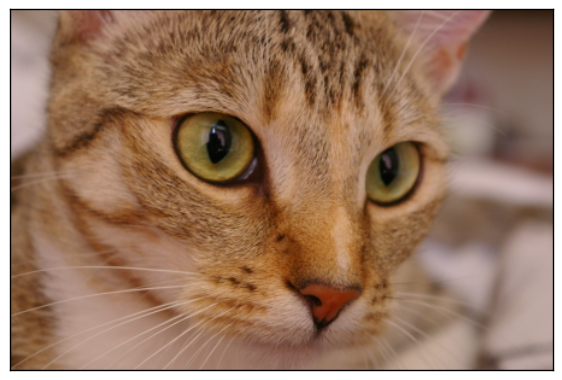

In [6]:
# Leo la imagen chelsea (es un gato)
chelsea = data.chelsea()

imshow(chelsea)

# Elementos estructurales

In [9]:
# Elementos tipo disco (los más empleados)
# Especificamos el radio del disco
elemento_estructural_disco = disk(20)
# Lo mostramos por pantalla
elemento_estructural_disco

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

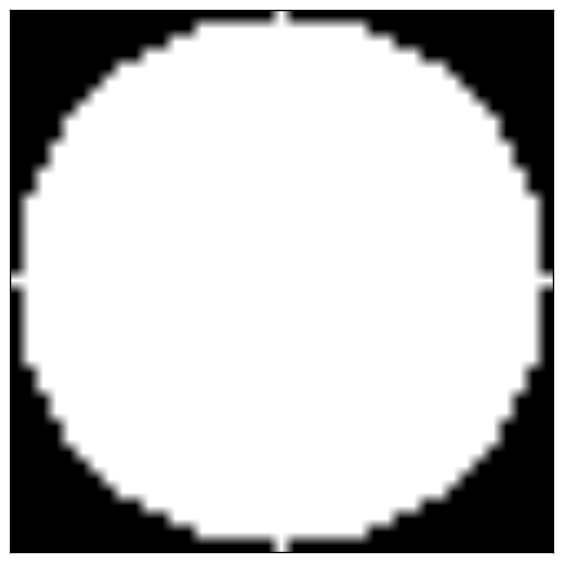

In [10]:
imshow(elemento_estructural_disco)

In [15]:
# Elementos tipo diamante (los más empleados)
# Especificamos el radio del diamante
elemento_estructural_diamante = diamond(30)
# Lo mostramos por pantalla
elemento_estructural_diamante

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

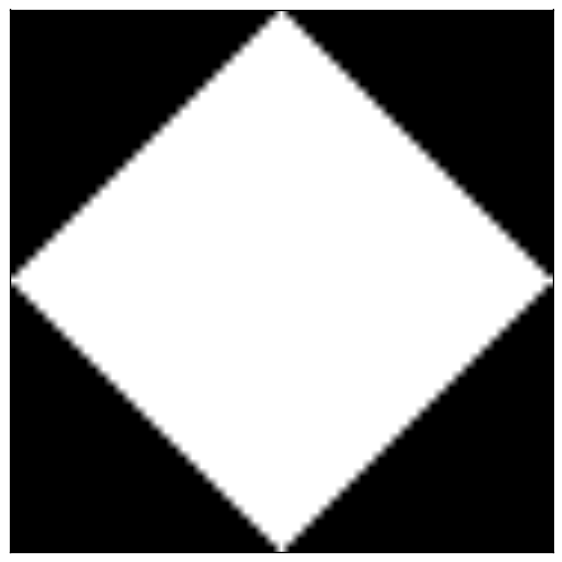

In [16]:
imshow(elemento_estructural_diamante)

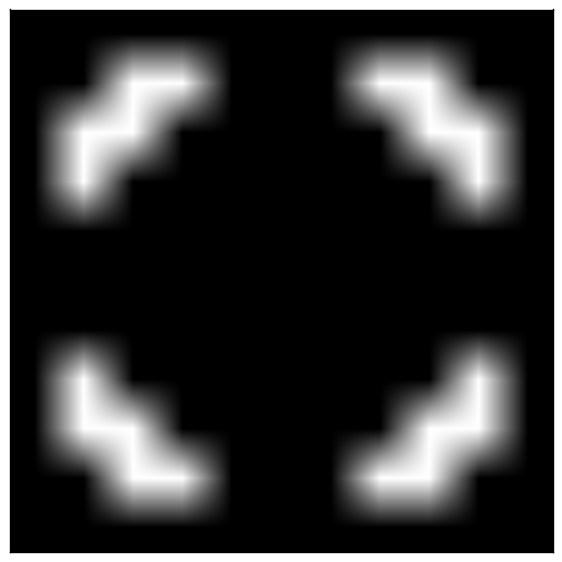

In [18]:
# Si ahora comparamos dos elementos estructurales (disco y diamante), 
# vemos su diferencia cuando los valores son muy grandes
imshow(np.abs(diamond(5)-disk(5)))

# Erosión

In [19]:
elemento_estructural_disco = disk(10)
chelsea_gray = rgb2gray(chelsea)
chelsea_eroded = erosion(chelsea_gray,elemento_estructural_disco)

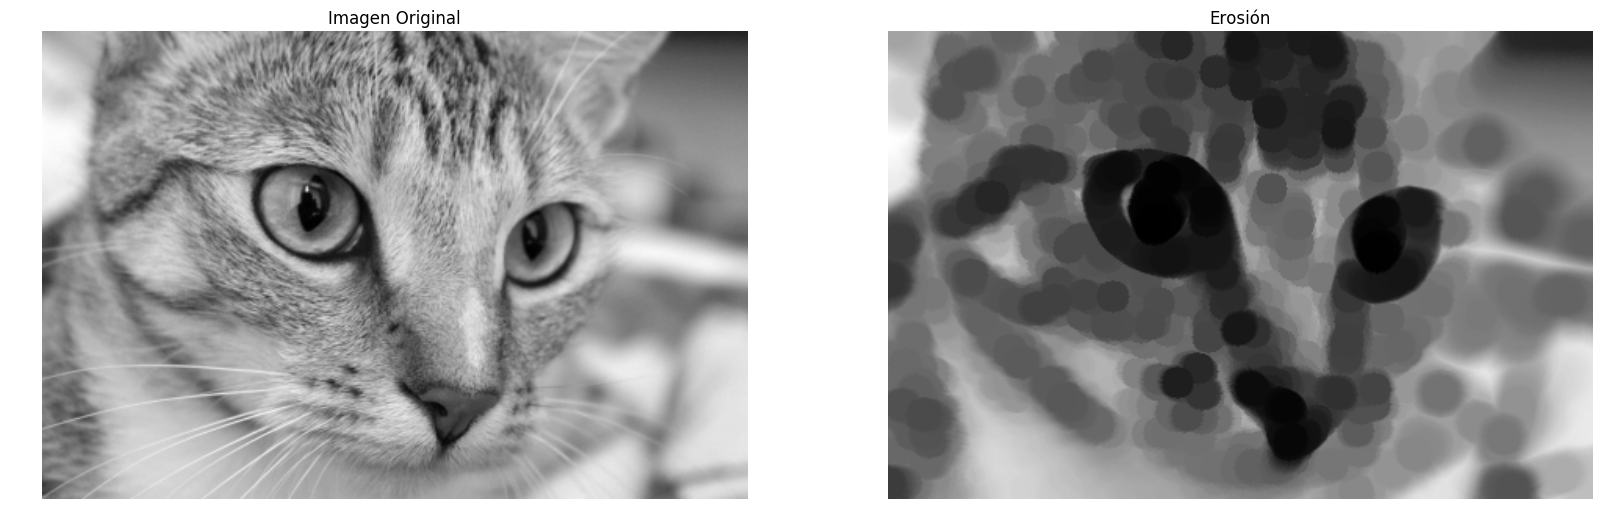

In [20]:
plot_comparison(chelsea_gray,chelsea_eroded,'Erosión')

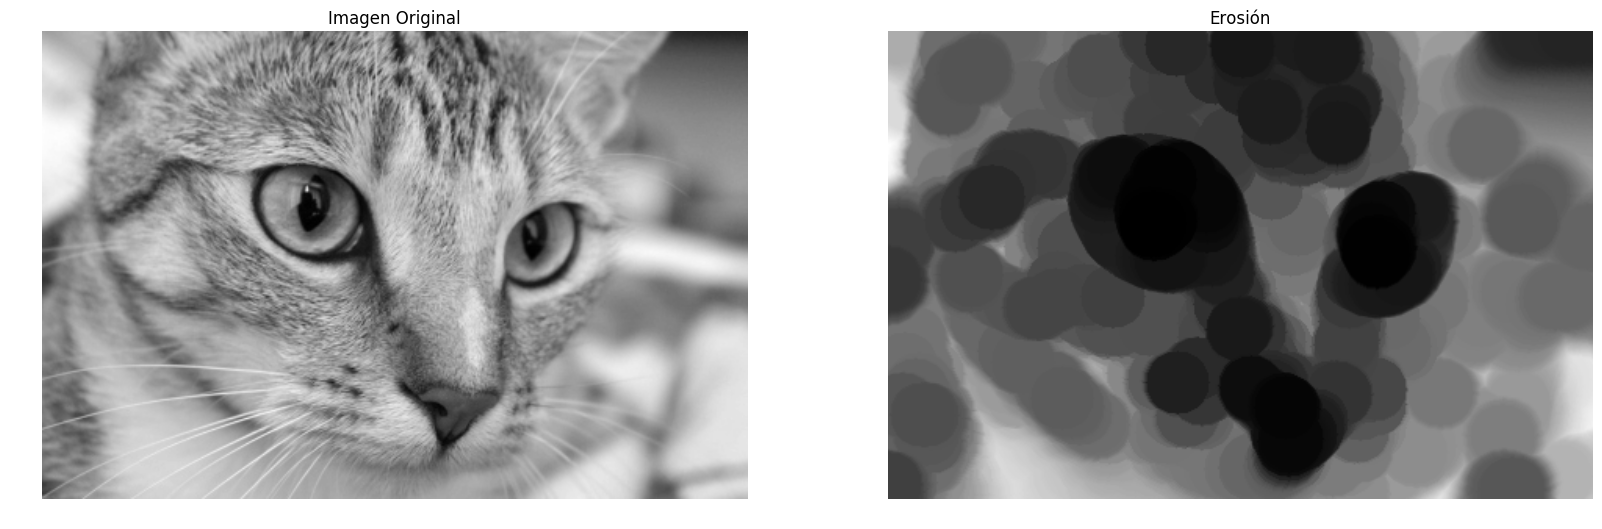

In [21]:
plot_comparison(chelsea_gray,erosion(chelsea_gray,disk(20)),'Erosión')

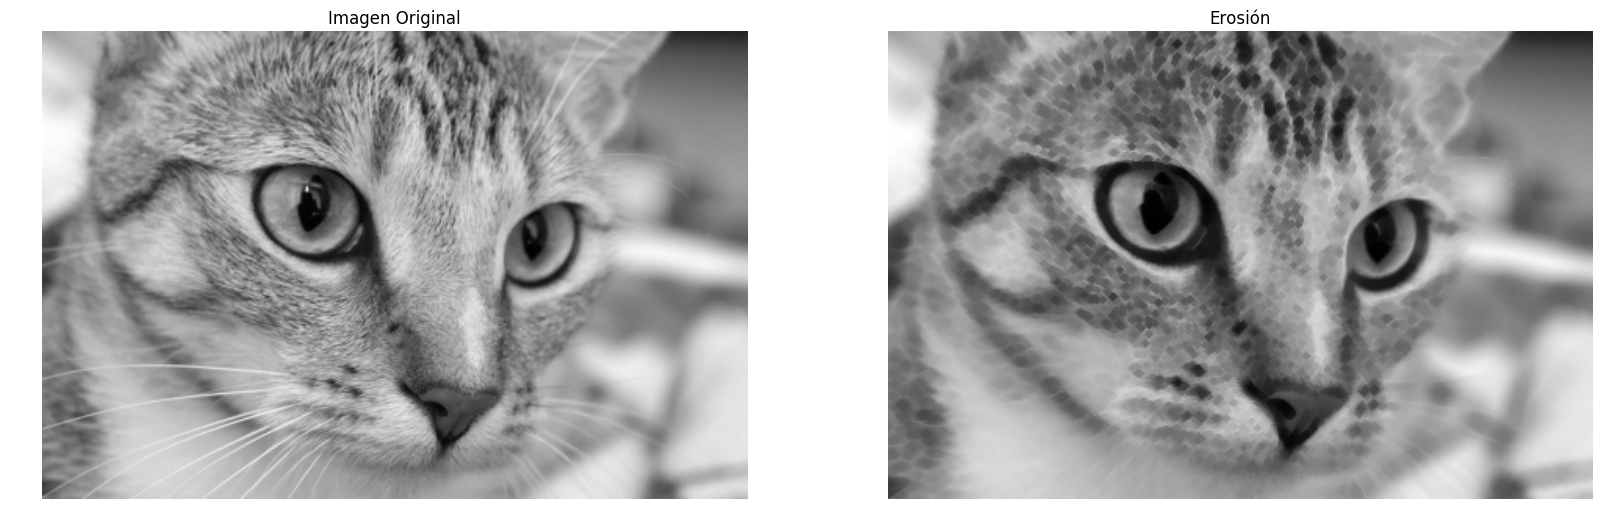

In [22]:
plot_comparison(chelsea_gray,erosion(chelsea_gray,disk(2)),'Erosión')

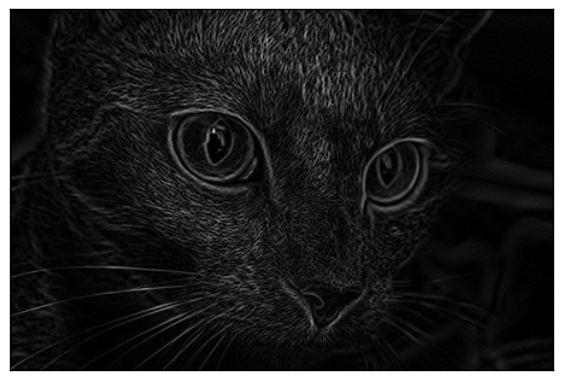

In [23]:
# Obtenemos la diferencia entre la imagen original y la imagen erosionada
imshow(chelsea_gray-erosion(chelsea_gray,disk(2)))

In [24]:
# Para obtener el histograma de una imagen (en este caso nbins 10)
from skimage import data, exposure, img_as_float
exposure.histogram(chelsea_gray, nbins=10)

(array([  971,  2171,  4040,  8382, 18469, 29427, 32736, 23188, 13322,
         2594]),
 array([0.05214529, 0.12619431, 0.20024333, 0.27429235, 0.34834137,
        0.42239039, 0.49643941, 0.57048843, 0.64453745, 0.71858647]))

In [25]:
# Nos quedamos con esta componente (la llamamos red porque luego la pintaremos en la capa roja de color)
red = chelsea_gray-erosion(chelsea_gray,disk(2))>0.2

In [26]:
# Hacemos una copia de la imagen original
chelsea_color = chelsea.copy()

In [27]:
# Primero binarizamos la imagen, y posteriormente, la multiplicamos por 255 (que es el color blanco)
chelsea_color[:,:,0] = 255*(red>0)

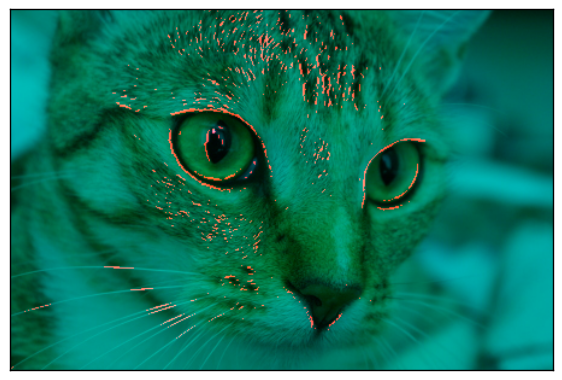

In [28]:
imshow(chelsea_color)

In [29]:
# Tiempo de procesamiento de estos algoritmos
import time
arrayRadius = [1,2,5,10,25,40,50,75,100]
diffTime = []
for radius in arrayRadius:
    print('radius '+str(radius))
    tic = time.clock()
    chelsea_eroded = erosion(chelsea_gray,disk(radius))
    toc = time.clock()
    diffTime.extend([toc-tic])

radius 1
radius 2
radius 5
radius 10
radius 25
radius 40
radius 50
radius 75
radius 100


In [30]:
# Tiempo de procesamiento de estos algoritmos
import time
arrayRadius = [1,2,5,10,25,40,50,75,100]
diffTimeOpening = []
for radius in arrayRadius:
    print('radius '+str(radius))
    tic = time.clock()
    chelsea_opening = opening(chelsea_gray,disk(radius))
    toc = time.clock()
    diffTimeOpening.extend([toc-tic])

radius 1
radius 2
radius 5
radius 10
radius 25
radius 40
radius 50
radius 75
radius 100


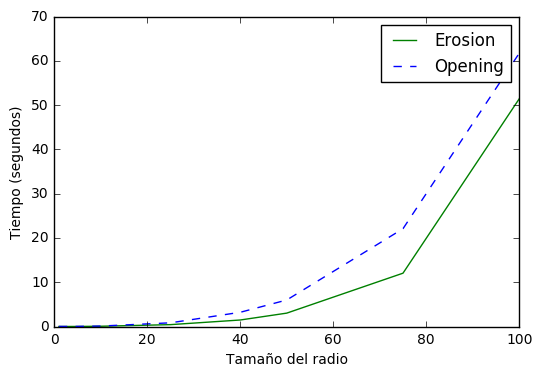

In [31]:
plt.plot(arrayRadius, diffTime,"g-",label='Erosion') 
plt.plot(arrayRadius, diffTimeOpening, "b--",label='Opening')
plt.xlabel('Tamaño del radio')
plt.ylabel('Tiempo (segundos)')
plt.legend()
plt.show()

In [32]:
# Mediana de las diferencias entre erosión y opening
np.median([diffTimeOpening[i]/diffTime[i] for i in range(len(diffTime))])

1.981932028751691